In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
path = './runs/chaoticpend_overnight_damped4mm_attempt3.tsv'

In [3]:
tsv = pd.read_csv(path, sep = '\t', header = None)
tsv.columns = ['x', 'v', 'a']
tsv

,x,v,a
0,0.297123,0.484055,-9.299196
1,0.302249,0.365505,-9.376339
2,0.305913,0.253977,-9.182925
3,0.308289,0.148129,-9.064613
4,0.309402,0.036422,-9.101156
...,...,...,...
199994,0.000000,0.000000,0.000000
199995,0.000000,0.000000,0.000000
199996,0.000000,0.000000,0.000000
199997,0.000000,0.000000,0.000000


In [4]:
#bin every 200 points
x = np.array(tsv['x'])
v = np.array(tsv['v'])

x0 = x[0::200]
v0 = v[0::200]

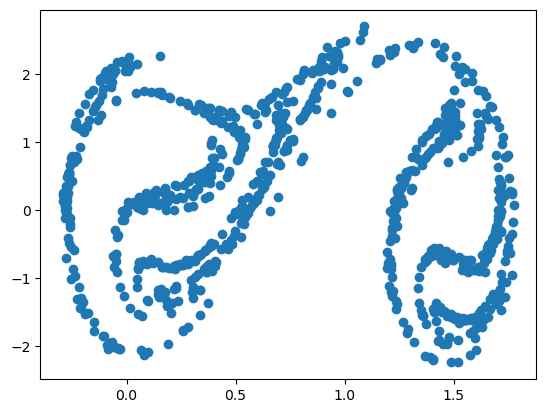

In [16]:
plt.scatter(x0, v0)
plt.show()

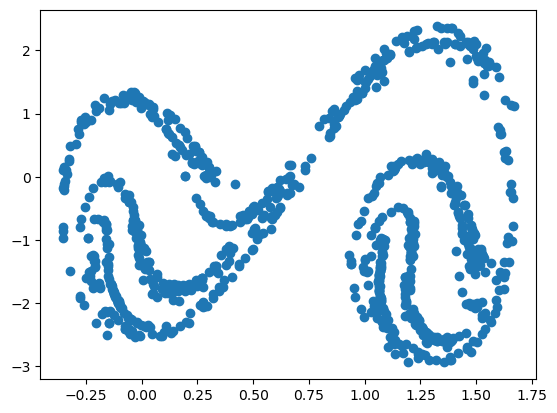

In [18]:
plt.scatter(x[20::200], v[20::200])
plt.show()

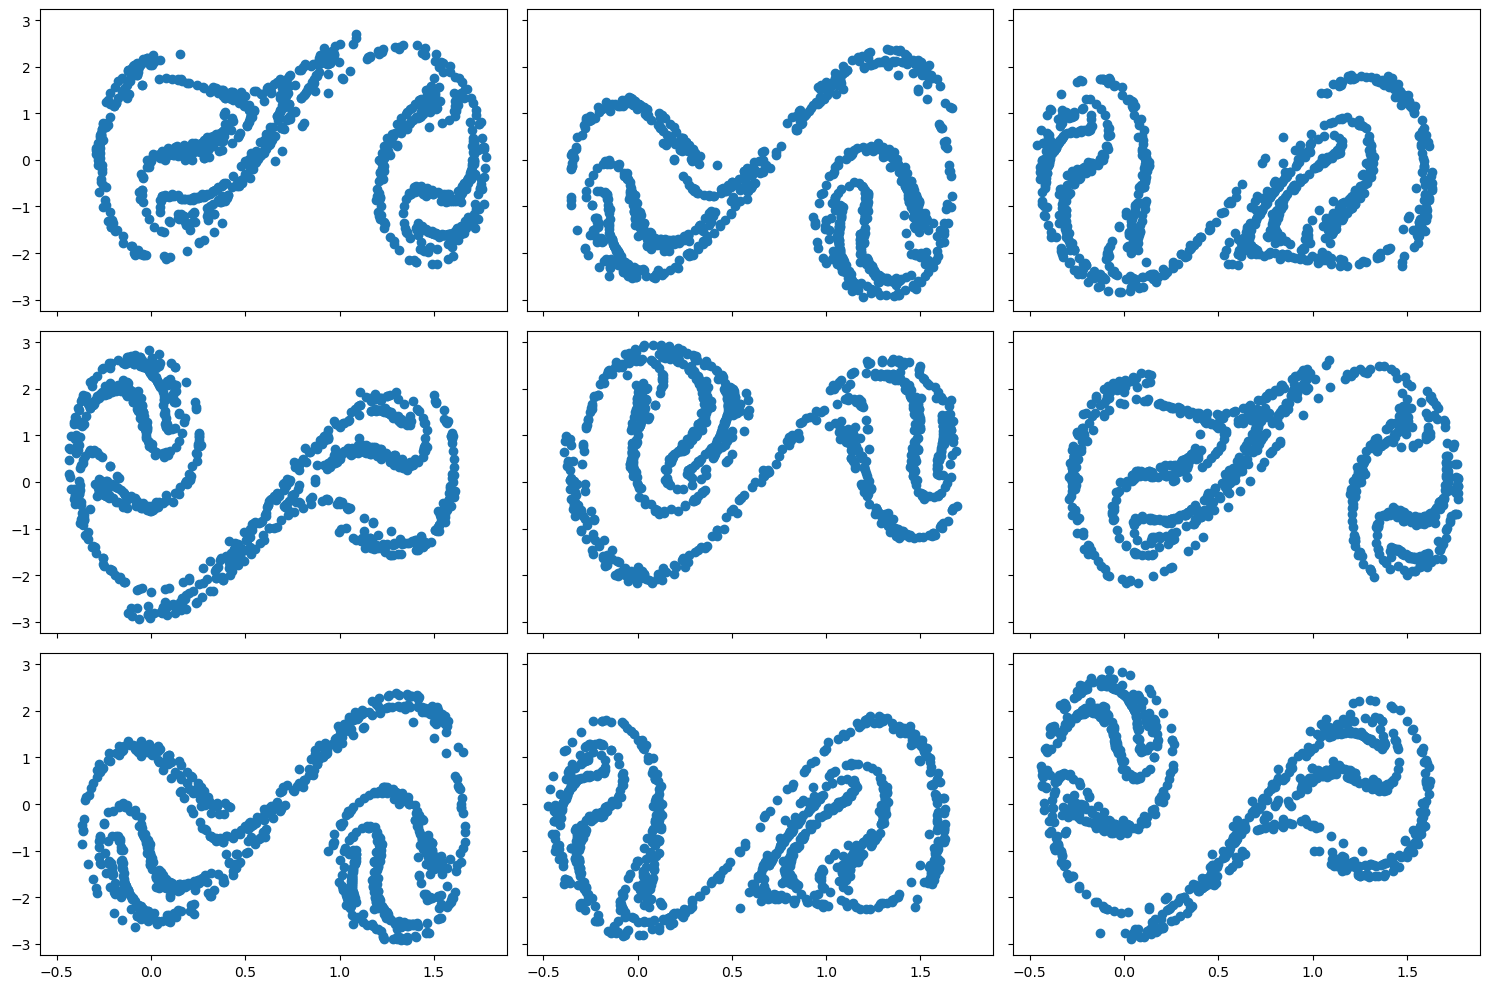

In [19]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex = True, sharey = True)

fig.set_figheight(10)
fig.set_figwidth(15)

ax1.scatter(x[0::200], v[0::200])
ax2.scatter(x[20::200], v[20::200])
ax3.scatter(x[40::200], v[40::200])
ax4.scatter(x[60::200], v[60::200])
ax5.scatter(x[80::200], v[80::200])
ax6.scatter(x[100::200], v[100::200])
ax7.scatter(x[120::200], v[120::200])
ax8.scatter(x[140::200], v[140::200])
ax9.scatter(x[160::200], v[160::200])

plt.tight_layout()

plt.show()

# Bin data

In [20]:
path_bin = './runs/chaoticpend_overnight_damped4mm_attempt3.BIN'

In [21]:
data = np.fromfile(path_bin, dtype='>i2')
df = pd.DataFrame(data)
df.columns = ['x']
df['theta'] = df.x *2 * np.pi / (1440)

df

,x,theta
0,0,0.000000
1,0,0.000000
2,0,0.000000
3,0,0.000000
4,0,0.000000
...,...,...
9999995,144,0.628319
9999996,145,0.632682
9999997,146,0.637045
9999998,147,0.641409


In [22]:
vNumerical = np.gradient(df['theta'], list(df.index.values))

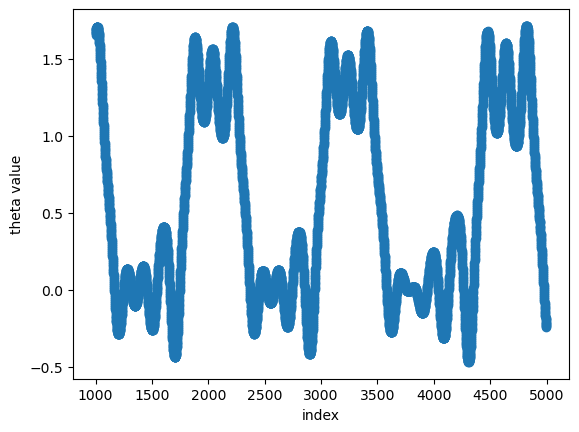

In [23]:
plt.scatter(list(df.index.values)[1000:5000], df['theta'][1000:5000])
plt.xlabel('index')
plt.ylabel('theta value')
plt.show()

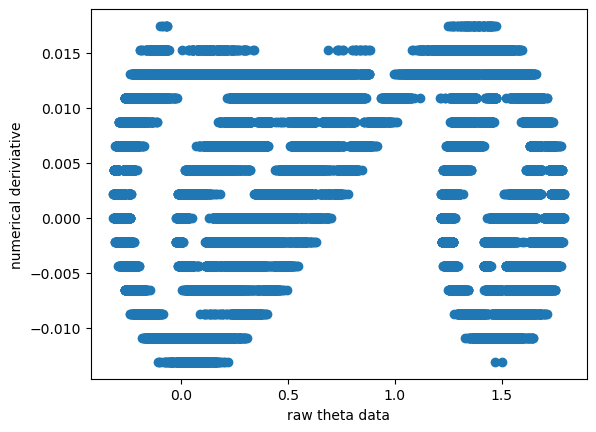

In [24]:
#sampling every 200 points
xbinSample = df['theta'][0::200]
wbinSample = vNumerical[0::200]


plt.scatter(xbinSample, wbinSample)
plt.xlabel('raw theta data')
plt.ylabel('numerical deriviative')
plt.show()

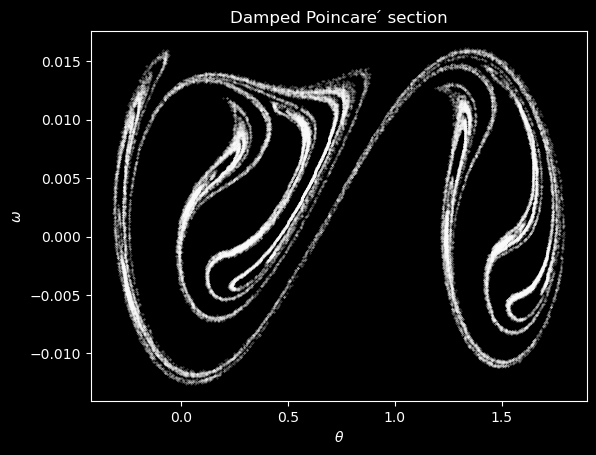

In [57]:
#Savitzky-Golay filter 
filter = scipy.signal.savgol_filter(vNumerical, 50, 3)

plt.style.use('dark_background')
plt.scatter(xbinSample, filter[0::200], s =0.1, c = 'w', alpha = 0.4)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')
plt.title('Damped Poincare ́ section')

plt.savefig('damped poincare.png')
plt.show()

# Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [161]:
#sgn w
def sgn(value):

    if value != 0:
        return value / np.abs(value)
    else: return 0

reg = tsv.copy()

reg = reg.loc[~(reg==0).all(axis=1)]
reg = reg.drop(columns = ['a'])
reg.columns = ['t', 'w']
reg['sgn'] = reg['w'].apply(lambda x: sgn(x))

reg['sinT'] = reg['t'].apply(lambda x: np.sin(x))
reg['cosT'] = reg['t'].apply(lambda x: np.cos(x))

inds = list(reg.index.values)

phis = []
for i in inds:
    phis.append((i % 200)*np.pi / 100)

reg['phi'] = phis

reg['cosPhi'] = reg['phi'].apply(lambda x: np.cos(x))
reg['sinPhi'] = reg['phi'].apply(lambda x: np.sin(x))

reg['aGiven'] = tsv['a']

reg = reg.drop(columns = ['phi'])
    

#drop omega less than 3

reg = reg.loc[np.abs(reg['w']) > 2.5].reset_index(drop = True)

reg

,t,w,sgn,sinT,cosT,cosPhi,sinPhi,aGiven
0,1.441709,-2.554629,-1.0,0.991680,0.128729,-0.968583,-0.248690,-4.880567
1,1.410402,-2.608028,-1.0,0.987164,0.159708,-0.960294,-0.278991,-3.714718
2,1.378623,-2.641652,-1.0,0.981591,0.190993,-0.951057,-0.309017,-2.718049
3,1.346293,-2.664541,-1.0,0.974905,0.222622,-0.940881,-0.338738,-1.152608
4,1.313916,-2.669697,-1.0,0.967187,0.254064,-0.929776,-0.368125,-0.033749
...,...,...,...,...,...,...,...,...
8042,0.115159,2.731919,1.0,0.114905,0.993376,-0.728969,0.684547,-2.374646
8043,0.148039,2.695658,1.0,0.147499,0.989062,-0.750111,0.661312,-3.186044
8044,0.180613,2.648582,1.0,0.179633,0.983734,-0.770513,0.637424,-4.492029
8045,0.212443,2.584364,1.0,0.210849,0.977519,-0.790155,0.612907,-5.499540


In [154]:
min(reg['w'])

-3.08935

In [162]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()


X = reg.iloc[:, 0:7].values
y = reg.iloc[:, 7].values

lin.fit(X, y)

LinearRegression()

In [163]:
r_sq = lin.score(X, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.8681289515684236


In [164]:
print(f"intercept: {lin.intercept_}")
print(f"Coefficients: {lin.coef_}")

intercept: 151.21971416240012
Coefficients: [-2.25356526e+02  2.95913690e-01 -8.13670596e-01  1.89621872e+02
 -1.51052142e+02 -1.57289775e-02  3.86602834e-02]


In [165]:
y_pred = lin.predict(X)

In [166]:
#get coefficients

def coeff(coefficients, intercept):
    C = intercept
    K = coefficients[0]
    G = coefficients[1]
    Gp = coefficients[2]
    Ms = coefficients[3]
    Mc = coefficients[4]
    Ec = coefficients[5]
    Es = coefficients[6]

    mu = np.sqrt(Ms**2 + Mc**2)
    deltaTheta = np.arctan(Mc / Ms)
    epsilon = np.sqrt(Ec**2 + Es**2)
    deltaPhi = np.arctan(-Es / Ec)
    theta0 = np.arctan(Mc / Ms) - (C / K)

    

    print('Gamma = '+ str(round(G*-1,4)))
    print('Gamma prime = '+ str(round(Gp*-1,4)))
    print('Kappa = '+ str(round(K*-1,4)))
    print('Mu = '+ str(round(mu,4)))
    print('delta Theta = '+ str(round(deltaTheta,4)))
    print('epsilon = '+ str(round(epsilon,4)))
    print('delta Phi = '+ str(round(deltaPhi,4)))
    print('Theta 0 = '+ str(round(theta0,4)))

In [167]:
coeff(lin.coef_, lin.intercept_)

Gamma = -0.2959
Gamma prime = 0.8137
Kappa = 225.3565
Mu = 242.4319
delta Theta = -0.6727
epsilon = 0.0417
delta Phi = 1.1844
Theta 0 = -0.0016


# Undamped

In [124]:
pathUndamped = './runs/chaoticpend_overnight_undamped_attempt2.tsv'

undamp = pd.read_csv(pathUndamped, sep = '\t', header = None)
undamp.columns = ['x', 'v', 'a']
undamp

,x,v,a
0,-1.183380,-0.440066,-6.874603
1,-1.189352,-0.526572,-6.536025
2,-1.196220,-0.611927,-6.509232
3,-1.204113,-0.686361,-6.344857
4,-1.212668,-0.764867,-6.930311
...,...,...,...
199994,0.000000,0.000000,0.000000
199995,0.000000,0.000000,0.000000
199996,0.000000,0.000000,0.000000
199997,0.000000,0.000000,0.000000


In [148]:
undampReg = undamp.copy()

undampReg = undampReg.loc[~(undampReg==0).all(axis=1)]
undampReg = undampReg.drop(columns = ['a'])
undampReg.columns = ['t', 'w']
undampReg['sgn'] = undampReg['w'].apply(lambda x: sgn(x))

undampReg['sinT'] = undampReg['t'].apply(lambda x: np.sin(x))
undampReg['cosT'] = undampReg['t'].apply(lambda x: np.cos(x))

inds = list(undampReg.index.values)

phis = []
for i in inds:
    phis.append((i % 200)*np.pi / 100)

undampReg['phi'] = phis

undampReg['cosPhi'] = undampReg['phi'].apply(lambda x: np.cos(x))
undampReg['sinPhi'] = undampReg['phi'].apply(lambda x: np.sin(x))

undampReg['aGiven'] = undamp['a']

undampReg = undampReg.drop(columns = ['phi'])


#drop omega less than 3

undampReg = undampReg.loc[np.abs(undampReg['w']) > 3].reset_index(drop = True)

undampReg

,t,w,sgn,sinT,cosT,cosPhi,sinPhi,aGiven
0,-1.520671,3.110277,1.0,-0.998744,0.050105,0.562083,-0.827081,9.387042
1,-1.482031,3.217441,1.0,-0.996063,0.088649,0.587785,-0.809017,7.006687
2,-1.442440,3.291329,1.0,-0.991774,0.128004,0.612907,-0.790155,4.910019
3,-1.402263,3.333693,1.0,-0.985832,0.167737,0.637424,-0.770513,3.221730
4,-1.361552,3.362122,1.0,-0.978188,0.207721,0.661312,-0.750111,1.396343
...,...,...,...,...,...,...,...,...
8203,-1.363822,3.099832,1.0,-0.978657,0.205500,0.876307,-0.481754,1.270253
8204,-1.325997,3.098315,1.0,-0.970186,0.242362,0.891007,-0.453990,-0.717357
8205,-1.288587,3.087100,1.0,-0.960443,0.278478,0.904827,-0.425779,-1.591054
8206,-1.251175,3.068060,1.0,-0.949354,0.314207,0.917755,-0.397148,-2.955670


In [149]:
linUndamp = LinearRegression()


X = undampReg.iloc[:, 0:7].values
y = undampReg.iloc[:, 7].values

linUndamp.fit(X, y)

r_sqUndamp = linUndamp.score(X, y)
print(f"coefficient of determination: {r_sqUndamp}")


coefficient of determination: 0.8859375167990761


In [150]:
coeff(linUndamp.coef_, linUndamp.intercept_)

Gamma = 0.0126
Gamma prime = -0.0055
Kappa = 219.1372
Mu = 236.4967
delta Theta = 0.6967
epsilon = 0.0659
delta Phi = 1.0512
Theta 0 = -0.0005
